In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import  confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
veri=pd.read_csv("dataset.csv")
print(veri.head())
print(veri.dtypes)
print(veri.isnull().sum())

   id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                 1               2             0   
1  125000.0003  ...                 1               2             0   
2  200000.0051  ...                 1               3             0   
3  166666.6608  ...                 1               3             0   
4  100000.0025  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1     

id                  int64
dur               float64
spkts               int64
dpkts               int64
sbytes              int64
                   ...   
Generic             uint8
Normal              uint8
Reconnaissance      uint8
Shellcode           uint8
Worms               uint8
Length: 204, dtype: object
Test Score 1.0
Train Score 1.0
Accurancy 1.0
F-score 1.0
Precision Score 1.0
Recall Score, 1.0
[learning_curve] Training set sizes: [  2319   7004  11689  16375  21060  25746  30431  35117  39802  44487
  49173  53858  58544  63229  67915  72600  77285  81971  86656  91342
  96027 100713 105398 110083 114769 119454 124140 128825 133511 138196
 142881 147567 152252 156938 161623 166309 170994 175679 180365 185050
 189736 194421 199107 203792 208477 213163 217848 222534 227219 231905]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished


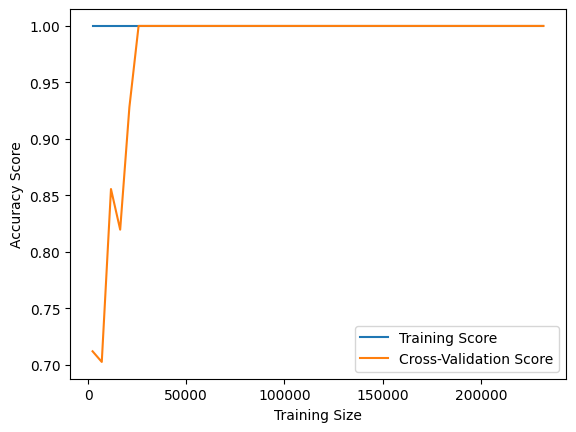

In [44]:
proto=pd.get_dummies(veri["proto"],drop_first=True)
service=pd.get_dummies(veri["service"],drop_first=True)
state=pd.get_dummies(veri["state"],drop_first=True)
attack_cat=pd.get_dummies(veri["attack_cat"],drop_first=True)
veri.drop(["proto","service","state","attack_cat"],axis=1,inplace=True)
objectveri=pd.concat([proto,service,state,attack_cat],axis=1)
yeniveri=veri.join(objectveri)
print(yeniveri.dtypes)
le=LabelEncoder()
target=le.fit_transform(yeniveri["label"])
yeniveri["label"]=target
x=yeniveri.drop("label",axis=1)
y=yeniveri["label"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
print("Test Score", clf.score(x_test,y_test))
print("Train Score", clf.score(x_train,y_train))
tahmin=clf.predict(x_test)
cm=confusion_matrix(y_test,tahmin)
print("Accurancy",accuracy_score(y_test,tahmin))
print("F-score",f1_score(y_test,tahmin))
print("Precision Score",precision_score(y_test,tahmin))
print("Recall Score,",recall_score(y_test,tahmin))
train_sizes,train_scores,test_scores=learning_curve(clf,x,y,cv=10,scoring="accuracy",n_jobs=-1,train_sizes=np.linspace(0.01,1,50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
plt.plot(train_sizes,train_mean,label="Training Score")
plt.plot(train_sizes,test_mean,label="Cross-Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")

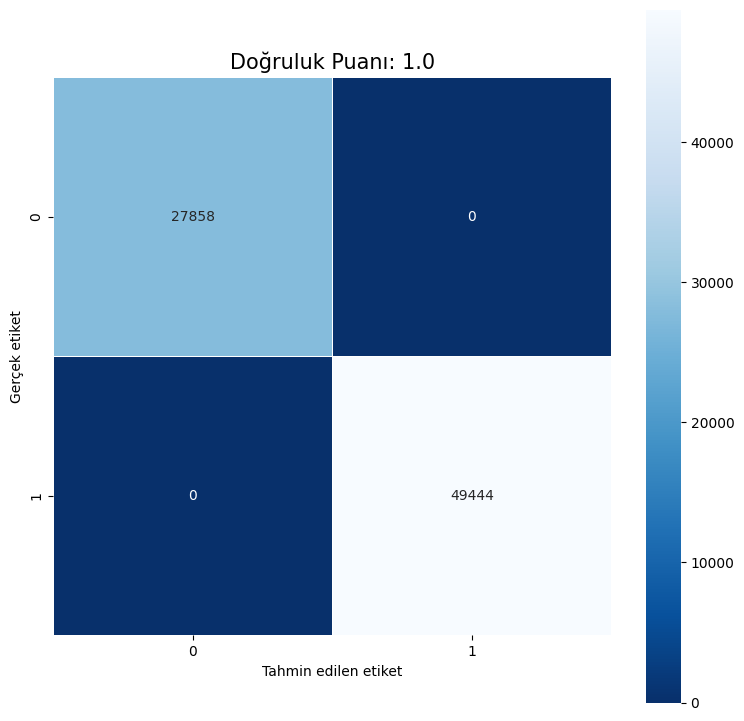

In [4]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Gerçek etiket');
plt.xlabel('Tahmin edilen etiket');
all_sample_title = 'Doğruluk Puanı: {0}'.format(accuracy_score(y_test,tahmin))
plt.title(all_sample_title, size = 15);